##### Set Up

In [1]:
## imports and dependencies

# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# models
from sklearn.ensemble import RandomForestRegressor

# data split
from sklearn.model_selection import train_test_split

# scaling
from sklearn.preprocessing import StandardScaler

# PCA
from sklearn.decomposition import PCA

# accuracy
from sklearn.metrics import mean_absolute_error


##### Data

In [2]:
# data
df = pd.read_csv("region_dataset.csv")

In [3]:
df = df.drop(['Name', 'Weekly Gross', 'Total Gross', 'Annual Gross', 'Weekly Net', 'Annual Net', 'Ln Annual Net', 'AgeSQ', 'Gen Pos_D', 'Gen Pos_M', 'Gen Pos_F'], axis=1)

##### Pre Processing

In [4]:
# parameters and target
x = df.drop('Ln Weekly Gross', axis=1)
y = df['Ln Weekly Gross']

In [5]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
# scale
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [7]:
# PCA
pca = PCA(n_components=0.9)  
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

In [8]:
# Random Forest Scaled
rf_scaled = RandomForestRegressor()
rf_scaled.fit(x_train_scaled, y_train)
y_pred_scaled = rf_scaled.predict(x_test_scaled)
mae_scaled = mean_absolute_error(y_test, y_pred_scaled)
print("Mean Absolute Error (scaled):", mae_scaled)

Mean Absolute Error (scaled): 0.38453152622653236


In [9]:
# Random Forest PCA
rf_pca = RandomForestRegressor()
rf_pca.fit(x_train_pca, y_train)
y_pred_pca = rf_pca.predict(x_test_pca)
mae_pca = mean_absolute_error(y_test, y_pred_pca)
print("Mean Absolute Error (PCA):", mae_pca)

Mean Absolute Error (PCA): 0.5251181402370814


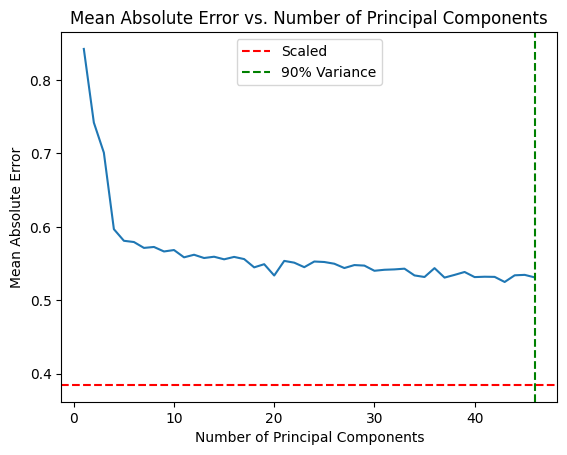

In [10]:
# iterate through numbers of principal components
num_components = range(1, pca.n_components_ + 1)
mae_values = []

for n in num_components:
    pca = PCA(n_components=n)
    x_train_pca = pca.fit_transform(x_train_scaled)
    x_test_pca = pca.transform(x_test_scaled)

    rf = RandomForestRegressor()
    rf.fit(x_train_pca, y_train)
    y_pred = rf.predict(x_test_pca)

    mae = mean_absolute_error(y_test, y_pred)
    mae_values.append(mae)

# Plot the mean absolute error vs. number of principal components
plt.plot(num_components, mae_values)
plt.xlabel("Number of Principal Components")
plt.ylabel("Mean Absolute Error")
plt.title("Mean Absolute Error vs. Number of Principal Components")
plt.axhline(y=mae_scaled, color='r', ls='--', label='Scaled')
plt.axvline(x=pca.n_components_, color='g', ls='--', label='90% Variance')
plt.legend()
plt.show()

In [11]:
num_components[mae_values.index(min(mae_values))], min(mae_values)

(43, 0.5248429766389411)

In [12]:
num_components

range(1, 47)

In [13]:
mae_values

[0.8424681559003645,
 0.7420842087056344,
 0.7010638900164238,
 0.5968045486350306,
 0.580971040095679,
 0.5792876681098568,
 0.5712763661560698,
 0.572551557060803,
 0.5664155525724167,
 0.5683596937929559,
 0.5584210844209165,
 0.5619443198886037,
 0.5574990289554715,
 0.559250842033121,
 0.5557155916913475,
 0.55900526688003,
 0.5560445026102764,
 0.5447596717557199,
 0.5490610118905837,
 0.5336386940683807,
 0.5535575920843879,
 0.5511570929292935,
 0.5450115796826775,
 0.5527233798898206,
 0.5520544209271303,
 0.5497038233451667,
 0.543831127651591,
 0.5478796213757832,
 0.5471618573479076,
 0.540108703433998,
 0.5414756445069548,
 0.5419791730226731,
 0.5429621387043074,
 0.5337585559335744,
 0.5316297202480952,
 0.5436959489622739,
 0.5308120455575533,
 0.5344974638957657,
 0.538465646530514,
 0.5314926139177557,
 0.5319883549430907,
 0.5317796754083002,
 0.5248429766389411,
 0.5339208827738696,
 0.5345223294172209,
 0.5310784963704507]